# STOR 566, Homework 1
### Instructor: Yao Li
### Keywords: optimization
### Due date: Sep 04 (moved to 7), 11:55pm
### **Submission Instruction**

- Please download this script and use it to answer the questions in the homework. 
- For submission, please include your code, code output and answers in the script and submit the ipynb file on sakai.
- Please don't modify existing cells. But you can add cells between the exercise statements.
- To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language. For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Mikhal Ben-Joseph

I collaborated with Kyle Sorenson and Yesh Munagala in accordance with the UNC Honor Code. I also attended Office Hours with Minji Kim.

## Problem 1 (10 points)

Prove whether the following functions are convex or not.
- (a) (5 points) $f(x_1,x_2)=(x_1x_2-1)^2$, where $x_1, x_2\in \mathbb{R}$.
- (b) (5 points) $f(\mathbf{w}_1, \mathbf{w}_2)=\|\mathbf{w}_1-\mathbf{w}_2\|^2_2$,  where $\mathbf{w}_1, \mathbf{w}_2\in \mathbb{R}^2$.


Solution of Problem 1 (a):

To define a function as convex, we must check that the hessian is positive semi-definite (since these functions are twice differentiable). 


$\begin{align*} ∇f(x_1, x_2) &= \begin{bmatrix} 2(x_1x_2-1)(x_2) \\ 2(x_1x_2-1)(x_1) \end{bmatrix} \\
&= \begin{bmatrix} 2(x_1x_2^2 - x_2) \\ 2(x_1^2x_2 - x_1) \end{bmatrix} \\
∇^2f(x_1, x_2) & = \begin{bmatrix} 2x_2^2 & 2(2x_1x_2-1) \\ 2(2x_1x_2-1) & 2x_1^2\end{bmatrix}
\end{align*}$

Now to check that this is positive semi-definite, we will use the following rule:
 
A is positive semi-definite if $x^TAx \geq 0 , ∀x_1, x_2$. 
$\begin{align*}
x^TAx & = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} 2x_2^2 & 2(2x_1x_2-1) \\ 2(2x_1x_2-1) & 2x_1^2\end{bmatrix} \begin{bmatrix} x_1 \\x_2 \end{bmatrix} \\
& = 12x_1^2x_2^2 - 4x_1x_2
\end{align*}$ 

Since this is not non-negative for all $x_1, x_2$, the function is not convex. 


Answer: The function $f(x_1,x_2)=(x_1x_2-1)^2$ where $x_1, x_2\in \mathbb{R}$ is not convex.

Solution of Problem 1 (b):
Just as in part A, we will find the hessian and then check if it is positive semi-definite in order to determine if the function is convex.

$\begin{align*} ∇f(\textbf{w}_1, \textbf{w}_2) &= \begin{bmatrix} 2(\textbf{w}_1 - \textbf{w}_2) \\ -2(\textbf{w}_1 - \textbf{w}_2)\end{bmatrix} \\
∇f^2 & = \begin{bmatrix}2 & -2 \\ -2 & 2 \end{bmatrix} \\
x^TAx &  =  \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix}2 & -2 \\ -2 & 2 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \\
& = 2x_1^2 - 4x_1x_2 + 2x_2^2 \\
&= 2(x_1-x_2)^2 \geq 0
\end{align*}$

The hessian matrix is positive semi-definite, so the function is convex.

Answer: The function $f(\mathbf{w}_1, \mathbf{w}_2)=\|\mathbf{w}_1-\mathbf{w}_2\|^2_2$ where $\mathbf{w}_1, \mathbf{w}_2\in \mathbb{R}^2$ is convex.

## Problem 2 (10 points)

Identify stationary points for $f(x) = 2x_1 +12x_2 +x^2_1 -3x^2_2$? Are they local minimum/maximum; global minimum/maximum or saddle points? Why?

Answer:

The stationary point (-1, 2) is a saddle point because the value of H in the second derivative test is less than 0 (i.e., one of the eigenvalues is positive while the other is negative).

Further explanation:
According to Fermat's rule: if $f: R^d → R$ is a multivariable function, $x^*$ is a stationary point of $f$ if $∇f(x^*) = 0$. \\
$∇f = \begin{bmatrix} 2 + 2x_1 \\ 12 - 6x_2 \end{bmatrix}$

Set each row equal to zero and solve so we have:

 $\begin{align*}2 + 2x_1 &= 0 \\
 x_1 &= -1 \\
 12 - 6x_2 &= 0 \\
 x_2 & = 2
 \end{align*} $

 Which gives us our stationary point at (-1,2).

 If the function is convex,then the extrema point is global. To check for convexity, let's examine the hessian:

 $∇f^2(x_1, x_2) = \begin{bmatrix} 2 & 0 \\ 0 & -6 \end{bmatrix}$

The matrix is not positive semi-definite because the principal minor of the 2x2 is -12. Therefore, the function is not convex and we will need to use the second derivative test to check if it is a local maximum or local minimum or saddle point.

$\begin{align*} H &= f_{xx}(x, y) * f_{yy}(x, y) - f_{xy}(x, y)^2 \\
&= 2(-6) + 0 \\ &= -12 < 0 \end{align*} $ 

We have a saddle point according to the second derivative test using the discriminant. One of the eigenvalues of the hessian is positive and one is negative.

## Problem 3 (80 points)

Given training data $\{\mathbf{x}_i, y_i\}^n_{i=1}$, each $x_i\in \mathbb{R}^d$ and $y_i \in \{+1, -1\}$, we try to solve the following logistic regression problem by gradient descent:
\begin{align}
\min_{\mathbf{w}\in R^d}\left\{\frac{1}{n}\sum_{i=1}^n\log(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i})+\frac{1}{2}\|\mathbf{w}\|^2_2  \right\} := f(\mathbf{w}).
\end{align}
Test the algorithm using the 'heart scale' dataset with $n = 270$ and $d = 13$: the matrix $\mathbf{X}$ is stored in the file 'X$\_$heart', and the vector $\mathbf{y}$ is stored in the file 'y$\_$heart'. ('X$\_$heart' contains $n$ lines, each line stores a vector $\mathbf{x}_i$ with $d$ real numbers. 'y$\_$heart' contains the $\mathbf{y}$ vector.)

In [2]:
import os
import time
import numpy as np
import math
from numpy import linalg as la
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import io
import matplotlib.pyplot as plt

#importing some useful tools

In [3]:
## Please implement data loading yourself

In [4]:
from google.colab import files
uploaded = files.upload()

Saving X_heart to X_heart (1)
Saving y_heart to y_heart (1)


In [5]:
## Load data:

X_heart = pd.read_csv(io.BytesIO(uploaded['X_heart']), sep = ' ', header = None)
X_heart = X_heart.to_numpy()
X_heart

array([[ 0.70833,  1.     ,  1.     , ...,  0.     ,  1.     , -1.     ],
       [ 0.58333, -1.     ,  0.33333, ...,  0.     , -1.     ,  1.     ],
       [ 0.16667,  1.     , -0.33333, ..., -1.     , -1.     ,  1.     ],
       ...,
       [ 0.125  , -1.     , -0.33333, ...,  0.     , -1.     , -1.     ],
       [ 0.16667,  1.     ,  1.     , ...,  0.     , -1.     ,  0.5    ],
       [ 0.58333,  1.     ,  1.     , ...,  0.     ,  1.     , -1.     ]])

In [6]:
y_heart = pd.read_csv(io.BytesIO(uploaded['y_heart']), header = None)
print(y_heart.head())
y_heart = y_heart.to_numpy()
y_heart_ravel = y_heart.ravel()
print(y_heart_ravel.shape)

   0
0  1
1 -1
2  1
3 -1
4 -1
(270,)


### (a) (5 points) Compute the gradient of $f(\mathbf{w})$ w.r.t. $\mathbf{w}$.

Answer:
Using the rule for the derivative of a log and the definition of the 2-norm we have:

$ \begin{align*} 
f(\mathbf{w}) & = \frac{1}{n}\sum_{i=1}^n\log(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i})+\frac{1}{2}\|\mathbf{w}\|^2_2 \\
∇f(\mathbf{w}) &= \frac{1}{n}\sum_{i=1}^n \frac{-y_ix_ie^{-y_i\mathbf{w}^T\mathbf{x}_i}}{(ln(e))(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i})} + \mathbf{w} \\
∇f(\mathbf{w}) &= \frac{1}{n}\sum_{i=1}^n \frac{-y_ix_ie^{-y_i\mathbf{w}^T\mathbf{x}_i}}{1+e^{-y_i\mathbf{w}^T\mathbf{x}_i}} + \mathbf{w}
\end{align*} $

### (b) (30 points) Implement the gradient descent algorithm with a fixed step size $\eta$. Find a small $\eta_1$ such that the algorithm converges. Increase the step size to $\eta_2$ so the algorithm cannot converge. Run 50 iterations and plot the iteration versus $\log(f(\mathbf{x}^k) -f(\mathbf{x}^*))$ plot for $\eta_1$ and $\eta_2$. In practice it is impossible to get the exact optimal solution $\mathbf{x}^*$, so use the minimum value you computed as $f(\mathbf{x}^*)$ when you plot the figure. Report the $f(\mathbf{x}^*)$ value you used for generating the plots.

In [7]:
## Implementation of GD
## You can insert more code chunks and text cells between (b) and (c) if you want to.
## Your code:

In [8]:
  
# Logistic Loss with L2 Regularization 

n = len(X_heart)

def my_gradient(X, y, w):

    # I built this code in pieces to easily debug dimensionality issues

    yTXw = np.multiply(y,(np.dot(X, w)))
    # print("yTXw" , yTXw.shape)
    # print(np.dot(X.T, y).shape)

    div = np.divide((np.exp(-yTXw)), (1 + np.exp(-yTXw) ))
    # print("div shape", div.shape)
    product = -np.dot(np.divide(y*np.exp(-yTXw), 1.0 + np.exp(-yTXw)).T,X)
    # print("product shape", product.shape)
   
    grad = ((1/X.shape[0]) * product) + w
    # print("((1/X.shape[0]) * product)", ((1/X.shape[0]) * product).shape)
    # print(grad.shape)
    return grad


In [23]:
# We will use beta0 or beta1 as the initial weights throughout the remainder of this homework

beta0= np.zeros(X_heart.shape[1])
beta1 =  np.ones(X_heart.shape[1])
my_gradient(X_heart,y_heart_ravel, beta1)


array([0.989812  , 0.91035872, 0.88347504, 1.05226997, 1.07088846,
       1.17841771, 1.030824  , 0.99296678, 1.04583797, 1.10093331,
       1.06646291, 1.06226594, 0.97773412])

In [10]:
def Objective_Eval(X, y, w):
    
    n = X.shape[0]
      ## Note here that we want to sum over all the row entries of the data matrix X_heart
      ## This is equivalent to performing y.T (times) X (dot) w when you work out the linear algebra
    yTXw = np.multiply(y,(np.dot(X, w)))
    # print(yTXw.shape)
    sum = np.sum(np.log(1 + np.exp(-yTXw)))
    # print("np.exp(-yTXw)", np.exp(-yTXw).shape)
    # print("np.log(1 + np.exp(-yTXw)", np.log(1 + np.exp(-yTXw)).shape)
    # print("Sum shape", sum.shape, sum)
    reg = 1/2 * (la.norm(w))**2 
    obj = (1/n) *  sum + reg
    return obj   

In [11]:
Objective_Eval(X_heart, y_heart, beta0)

187.14973875118523

In [12]:
# Please Note: the code below is adapted from code from Profesor Quoc's STOR 590 class, which I took last semester.

def GD(X, y, objective_func, objective_grad, eta, x0, max_iter, tol):
    
    # Initialization
    beta_cur = x0
    
    # Store iterates
    fx_values = []
    
    for t in range(0, max_iter):
        
        # Evaluate the value and gradient of objective function
        grad_fx = objective_grad(X, y, beta_cur)
        fx_val  = objective_func(X, y, beta_cur)
        
        # Compute the relative error
        err = la.norm(grad_fx)
        fx_values.append(fx_val)
        
        print("Iter={:4d}, F(x)={:^3.4e}, Error={:^3.4e}".format(t, fx_val, err))
         
        # Has it converged yet?
        if err < tol:
            print("Convergence")
            break
        
        # Update step
        beta_cur = beta_cur - eta*grad_fx
        
    return beta_cur, fx_val, err, fx_values

In [13]:
def plot_iter(hist, small, eta):
  plt.plot(range(0,len(hist)), np.log(hist - small))
  plt.title(f"Gradient Descent with min at {round(small, 5)} and eta {eta}")
  plt.ylabel('log(f(x_t) - f(x*))')
  plt.xlabel('Iteration')
  plt.show()  

In [14]:
beta_t1, f_val1, err1, hist1 = GD(X_heart, y_heart_ravel, Objective_Eval, my_gradient, 0.01, beta0, max_iter=50, tol=1e-3)

Iter=   0, F(x)=6.9315e-01, Error=4.6794e-01
Iter=   1, F(x)=6.9097e-01, Error=4.6095e-01
Iter=   2, F(x)=6.8886e-01, Error=4.5407e-01
Iter=   3, F(x)=6.8682e-01, Error=4.4730e-01
Iter=   4, F(x)=6.8483e-01, Error=4.4063e-01
Iter=   5, F(x)=6.8291e-01, Error=4.3406e-01
Iter=   6, F(x)=6.8104e-01, Error=4.2759e-01
Iter=   7, F(x)=6.7922e-01, Error=4.2122e-01
Iter=   8, F(x)=6.7746e-01, Error=4.1495e-01
Iter=   9, F(x)=6.7575e-01, Error=4.0878e-01
Iter=  10, F(x)=6.7409e-01, Error=4.0270e-01
Iter=  11, F(x)=6.7248e-01, Error=3.9671e-01
Iter=  12, F(x)=6.7092e-01, Error=3.9082e-01
Iter=  13, F(x)=6.6940e-01, Error=3.8502e-01
Iter=  14, F(x)=6.6793e-01, Error=3.7930e-01
Iter=  15, F(x)=6.6650e-01, Error=3.7368e-01
Iter=  16, F(x)=6.6512e-01, Error=3.6814e-01
Iter=  17, F(x)=6.6377e-01, Error=3.6268e-01
Iter=  18, F(x)=6.6247e-01, Error=3.5731e-01
Iter=  19, F(x)=6.6120e-01, Error=3.5203e-01
Iter=  20, F(x)=6.5997e-01, Error=3.4682e-01
Iter=  21, F(x)=6.5878e-01, Error=3.4169e-01
Iter=  22,

α at 0.01 is too small to converge within 50 iterations. So, to answer the exact question in the homework of finding an alpha which converges within 50 iterations, we know we'll need to use a slightly bigger α. Please see the code below.

In [15]:
beta_t2, f_val2, err2, hist2 = GD(X_heart, y_heart_ravel, Objective_Eval, my_gradient, 0.15, beta0, max_iter=50, tol=1e-3)

Iter=   0, F(x)=6.9315e-01, Error=4.6794e-01
Iter=   1, F(x)=6.6398e-01, Error=3.6337e-01
Iter=   2, F(x)=6.4637e-01, Error=2.8298e-01
Iter=   3, F(x)=6.3568e-01, Error=2.2104e-01
Iter=   4, F(x)=6.2914e-01, Error=1.7317e-01
Iter=   5, F(x)=6.2513e-01, Error=1.3604e-01
Iter=   6, F(x)=6.2265e-01, Error=1.0714e-01
Iter=   7, F(x)=6.2111e-01, Error=8.4580e-02
Iter=   8, F(x)=6.2015e-01, Error=6.6909e-02
Iter=   9, F(x)=6.1955e-01, Error=5.3033e-02
Iter=  10, F(x)=6.1917e-01, Error=4.2112e-02
Iter=  11, F(x)=6.1893e-01, Error=3.3497e-02
Iter=  12, F(x)=6.1878e-01, Error=2.6688e-02
Iter=  13, F(x)=6.1868e-01, Error=2.1296e-02
Iter=  14, F(x)=6.1862e-01, Error=1.7018e-02
Iter=  15, F(x)=6.1858e-01, Error=1.3619e-02
Iter=  16, F(x)=6.1856e-01, Error=1.0914e-02
Iter=  17, F(x)=6.1854e-01, Error=8.7588e-03
Iter=  18, F(x)=6.1853e-01, Error=7.0384e-03
Iter=  19, F(x)=6.1852e-01, Error=5.6633e-03
Iter=  20, F(x)=6.1852e-01, Error=4.5629e-03
Iter=  21, F(x)=6.1852e-01, Error=3.6810e-03
Iter=  22,

When α = 0.15 the algorithm converges within 50 iterations!

Plot of a small step size $\eta_1$:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


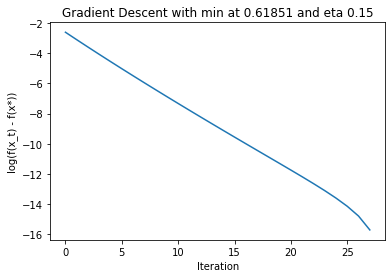

In [16]:
smallest = np.min(hist2)

plot_iter(hist2, smallest, eta = 0.15)

Plot of a small step size $\eta_2$:

Now I will show the small step size $η_2$ where the loss diverges instead of converging to 0.

In [17]:
beta_t3, f_val3, err3, hist3 = GD(X_heart, y_heart_ravel, Objective_Eval, my_gradient, 2, beta0, max_iter=50, tol=1e-3)

Iter=   0, F(x)=6.9315e-01, Error=4.6794e-01
Iter=   1, F(x)=8.8586e-01, Error=8.4860e-01
Iter=   2, F(x)=1.5133e+00, Error=1.6132e+00
Iter=   3, F(x)=3.6099e+00, Error=2.6030e+00
Iter=   4, F(x)=7.0622e+00, Error=3.8450e+00
Iter=   5, F(x)=1.3327e+01, Error=5.1540e+00
Iter=   6, F(x)=2.0697e+01, Error=6.5066e+00
Iter=   7, F(x)=3.1042e+01, Error=7.8839e+00
Iter=   8, F(x)=4.2517e+01, Error=9.2776e+00
Iter=   9, F(x)=5.7003e+01, Error=1.0685e+01
Iter=  10, F(x)=7.2697e+01, Error=1.2103e+01
Iter=  11, F(x)=9.1403e+01, Error=1.3529e+01
Iter=  12, F(x)=1.1138e+02, Error=1.4962e+01
Iter=  13, F(x)=1.3436e+02, Error=1.6401e+01
Iter=  14, F(x)=1.5866e+02, Error=1.7845e+01
Iter=  15, F(x)=1.8597e+02, Error=1.9293e+01
Iter=  16, F(x)=2.1463e+02, Error=2.0745e+01
Iter=  17, F(x)=2.4631e+02, Error=2.2202e+01
Iter=  18, F(x)=2.7938e+02, Error=2.3662e+01
Iter=  19, F(x)=3.1546e+02, Error=2.5125e+01
Iter=  20, F(x)=3.5297e+02, Error=2.6590e+01
Iter=  21, F(x)=3.9348e+02, Error=2.8059e+01
Iter=  22,

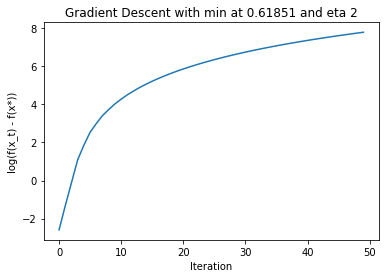

In [18]:
plot_iter(hist3, smallest, 2)

The $f(\mathbf{x}^*)$ value used is the minimum value of the objective from the run with eta = 0.1, which is approximately 0.61851. 

Please note, I used the same minimum value $f(\mathbf{x}^*)$ for all the plots in this section; not the minimum value within each different run of the algorithm. Minji said that would be okay.



### (c) (5 points) Write down the pseudo code of gradient descent with backtracking line search ($\sigma=0.01$).

Pseudo code:
The following is essentialy what we went over in class on slide 8.

Initialize $w_0$ to some random values. Note that $\textbf{d}$ is the direction of descent, or the negative gradient.

For each t in (1, 2, 3...,max # iterations):


*     Compute the descent direction: $d = - \nabla f(w) $
*   For $\alpha = \alpha_{0}, \alpha_0/2, \alpha_0 / 4... $
  * Check if $f(\textbf{w} + α\textbf{d}) \leq f(\textbf{w}) + \sigma α \nabla f(w)^T\textbf{d}$, then break (i.e., your α remains at the value)
  * Else, update  $\textbf{w} ← \textbf{w} + \alpha \textbf{d}$
* Return final solution $\textbf{w}$

In words, what we're checking is if the value of alpha is sufficiently small to cause a decrease in the value of the objective function. If the step size is too large, it's possible that we may overshoot or not converge.

In slightly more detailed psuedocode, it would look like this:
 * While t < maximum # iterations
  * Compute the descent direction $d = - \nabla f(w) $
  * While $f(\textbf{w} + α\textbf{d})  > f(\textbf{w}) + \sigma α \nabla f(w)^T\textbf{d}$:
    *  update  $\textbf{w} ← \textbf{w} + \alpha \textbf{d}$
    * divide α by 2.

  * update the values for descent, the function value, and the weights
  *t = t+1
  
* Return final solution $\textbf{w}$


### (d) (20 points) Implement the gradient descent algorithm with backtracking line search ($\sigma=0.01$). Plot the same iteration versus $\log(f(\mathbf{x}^k) -f(\mathbf{x}^*))$ plot.

In [28]:
## Implementation of GD with line search
## You can insert more code chunks and text cells between (d) and (e) if you want to.
## Your code:

def LineSearch(X, y, obj_fun, obj_grad, initial_alpha, x0, max_iter=50):
    
    w_cur = x0
    t = 0
    hist_fx = []
    hist_grad = []
    hist_alpha = []

    fx_cur = obj_fun(X, y, w_cur)
    grad_cur = obj_grad(X, y, w_cur)

    # Starting the line search
    while t < max_iter and la.norm(grad_cur) > 1e-03:
      t += 1

      # Initialize the values we start with in each iteration
      descent = -1 * grad_cur
      alpha = initial_alpha
      w_new = w_cur + alpha*descent
      fx_new = obj_fun(X, y, w_new)
      grad_new = obj_grad(X, y, w_new)

      # Loop until the sufficient decrease condition is met
      while obj_fun(X, y, w_new) > obj_fun(X, y, w_cur) + 0.01*alpha*(np.dot(obj_grad(X, y, w_cur).T, descent)):
        alpha = alpha/2
        w_new = w_cur + alpha*descent
        fx_new = obj_fun(X, y, w_new)
        grad_new = obj_grad(X, y, w_new)

      # Update the values:
      w_cur = w_new
      fx_cur = fx_new
      grad_cur = grad_new


      # Keepting track of the steps
      hist_fx.append(fx_cur)
      hist_grad.append(grad_cur)
      hist_alpha.append(alpha)

      print(t, "-th iteration ",  "Objecive Value:", hist_fx[-1],  "   Error:", la.norm(hist_grad[-1]) )

    return w_cur, fx_cur, la.norm(hist_grad), hist_fx
  

In [29]:
beta_t4, f_val4, err4, hist4 = LineSearch(X_heart, y_heart_ravel, Objective_Eval, my_gradient, 1, beta0, max_iter=50)

1 -th iteration  Objecive Value: 0.6359699519876917    Error: 0.22922478918387232
2 -th iteration  Objecive Value: 0.6235439625092646    Error: 0.127890707814721
3 -th iteration  Objecive Value: 0.6204893840576705    Error: 0.08025697841267677
4 -th iteration  Objecive Value: 0.6193079842865906    Error: 0.05140750562376445
5 -th iteration  Objecive Value: 0.6188510038118518    Error: 0.03354180323204009
6 -th iteration  Objecive Value: 0.6186541213157363    Error: 0.021867386533671943
7 -th iteration  Objecive Value: 0.6185717085106222    Error: 0.01430923428745638
8 -th iteration  Objecive Value: 0.6185361637128011    Error: 0.009351104454881302
9 -th iteration  Objecive Value: 0.6185210659576218    Error: 0.006118078784208154
10 -th iteration  Objecive Value: 0.6185145820513782    Error: 0.004000223657286231
11 -th iteration  Objecive Value: 0.6185118162714155    Error: 0.0026166845743845315
12 -th iteration  Objecive Value: 0.61851063114363    Error: 0.001711173610795569
13 -th ite

The Plot:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


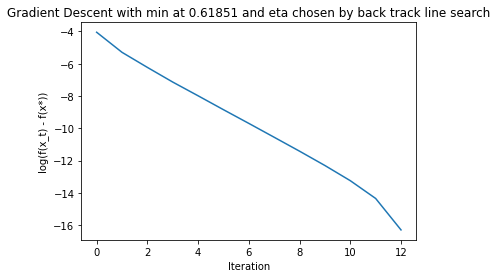

In [40]:
plot_iter(hist4, smallest, "chosen by back track line search")

It is easy to see that using backtrack linesearch, the convergence occurs within around 15 iterations. It took approximately 30 iterations to reach convergence in our earlier example with eta = .15

Note, I arbitrarily chose eta (interchangeable with alpha) = 1 to begin with. I could have chosen to start at another value with similar results.

### (e) (20 points) Test your implementation (gradient descent with backtracking line search) on a larger dataset 'epsilonsubset'. Plot the same iteration vs error plot.

In [31]:
## Implementation of GD with line search
## You can insert more code chunks and text cells between (d) and (e) if you want to.
## Your code:

from google.colab import files
uploaded = files.upload()

Saving x_epsilonsubset to x_epsilonsubset (1)
Saving y_epsilonsubset to y_epsilonsubset (1)


In [32]:
X_heart_eps = pd.read_csv(io.BytesIO(uploaded['x_epsilonsubset']), sep = ' ', header = None)
y_heart_eps = pd.read_csv(io.BytesIO(uploaded['y_epsilonsubset']), header = None)
X_heart_eps = X_heart_eps.to_numpy()
y_heart_eps = y_heart_eps.to_numpy()
y_heart_ravel_eps = y_heart_eps.ravel()

In [33]:
print(X_heart_eps.shape)
print(y_heart_ravel_eps.shape)

(20000, 2000)
(20000,)


In [36]:
beta_t5, f_val5, err5, hist5 = LineSearch(X_heart_eps, y_heart_ravel_eps, Objective_Eval, my_gradient, 0.1, np.zeros(X_heart_eps.shape[1]), max_iter=50)

1 -th iteration  Objecive Value: 0.693126321606565    Error: 0.013333692406219224
2 -th iteration  Objecive Value: 0.6931094336424712    Error: 0.011997578531344215
3 -th iteration  Objecive Value: 0.6930957606330946    Error: 0.010795375961624554
4 -th iteration  Objecive Value: 0.6930846904980182    Error: 0.00971366060115088
5 -th iteration  Objecive Value: 0.6930757276984275    Error: 0.008740354407544825
6 -th iteration  Objecive Value: 0.6930684710451649    Error: 0.007864590381628905
7 -th iteration  Objecive Value: 0.69306259573303    Error: 0.007076591103366904
8 -th iteration  Objecive Value: 0.6930578387963906    Error: 0.006367559454370636
9 -th iteration  Objecive Value: 0.6930539873344904    Error: 0.005729580303811664
10 -th iteration  Objecive Value: 0.6930508689789612    Error: 0.0051555320574001905
11 -th iteration  Objecive Value: 0.6930483441765242    Error: 0.0046390070795771145
12 -th iteration  Objecive Value: 0.6930462999411889    Error: 0.004174240098450029
13 

The Plot:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


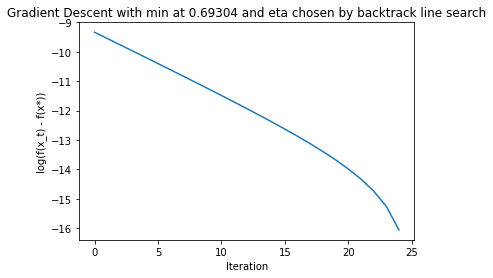

In [41]:
# Note: I am using a different f(x*) value (the minimum reached at this larger data set) which is 0.69304.
plot_iter(hist5, min(hist5), "chosen by backtrack line search")